# NO2 Models

## Init: Prepare Packages and Configuration

In [1]:
# Cancel the comment to install all the packages and libraries needed.
# ! pip install rasterio matplotlib rasterstats ipynbname imageio tqdm rasterstats
# ! pip install numpy==1.24.4CURR_PATH
# ! pip install libpysal
# ! pip install geopandas libpysal esda matplotlib
# ! pip install seaborn

# Configuration
from pathlib import Path
import sys

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# print(REPO_PATH)

## 0 Data Preparing

The following cell made the pre-processing of the data, including:

1) Integrate all the gpkg into a large file with date.

2) Add new features:

    - Yesterday NO2 (1 day lag)

    - Yesterday average NO2 level.

3) Export as parquet file for faster read in the future.

### **Addis Ababa**

In [ ]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm
from datetime import timedelta, datetime

mesh_folder = DATA_PATH / 'addis-mesh-data'
file_paths = sorted(mesh_folder.glob("*.gpkg")) 

all_data = []

for i, path in tqdm(enumerate(file_paths), total=len(file_paths)):
    date = datetime(2023, 1, 1) + timedelta(days=i)
    gdf = gpd.read_file(path)
    gdf["date"] = date
    all_data.append(gdf)

full_add_df = pd.concat(all_data, ignore_index=True)


In [ ]:
# import warnings
# from libpysal.weights import KNN

# # Add Yesterday NO2
# full_df.sort_values(["geom_id", "date"], inplace=True)
# full_df["no2_lag1"] = full_df.groupby("geom_id")["no2_mean"].shift(1)

# # Add neighbor no2 data
# sample_gdf = full_df[full_df['date'] == full_df['date'].min()].reset_index(drop=True)
# k_neighbors = 8 

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     w = KNN.from_dataframe(sample_gdf, k=k_neighbors)

# w.transform = 'r'

# geom_id_to_neighbors = {}
# index_to_geom_id = dict(sample_gdf['geom_id'].items())

# for i, neighbors in w.neighbors.items():
#     geom_id = index_to_geom_id[i]
#     neighbor_ids = [index_to_geom_id[j] for j in neighbors]
#     geom_id_to_neighbors[geom_id] = neighbor_ids

# def compute_neighbor_no2(row, df_dict):
#     date = row["date"]
#     geom_id = row["geom_id"]
#     prev_date = date - timedelta(days=1)
#     if prev_date not in df_dict:
#         return None
#     prev_day_df = df_dict[prev_date]
#     neighbors = geom_id_to_neighbors.get(geom_id, [])
#     values = prev_day_df[prev_day_df["geom_id"].isin(neighbors)]["no2_mean"]
#     return values.mean() if not values.empty else None

# df_by_date = {d: gdf for d, gdf in full_df.groupby("date")}
# full_df["no2_neighbor_lag1"] = full_df.apply(lambda row: compute_neighbor_no2(row, df_by_date), axis=1)

## Save the file
# full_df.to_parquet(DATA_PATH / "temp" / "full_addis_df.parquet", engine="pyarrow", compression="snappy")

Save the file for future use.

In [ ]:
# old version with no_lag 
import pandas as pd
full_addis_df = pd.read_parquet(DATA_PATH / "temp" / "full_addis_df.parquet", engine="pyarrow")

# add new col
# full_addis_df['cloud_category'] = full_add_df['cloud_category']
full_addis_df['LST_day_mean'] = full_add_df['LST_day_mean']
full_addis_df['landcover_2023'] = full_add_df['landcover_2023']

# save file
full_addis_df.to_parquet(DATA_PATH / "temp" / "full_addis_df.parquet", engine="pyarrow", compression="snappy")


In [ ]:
# full_add_df.tail(3)

# full_addis_df.columns
# full_addis_df.head(3)
# full_addis_df

### **Baghdad**

In [ ]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm
from datetime import timedelta, datetime

mesh_folder = DATA_PATH / 'baghdad-mesh-data'
file_paths = sorted(mesh_folder.glob("*.gpkg")) 

all_data = []

for i, path in tqdm(enumerate(file_paths), total=len(file_paths)):
    date = datetime(2023, 1, 1) + timedelta(days=i)
    gdf = gpd.read_file(path)
    gdf["date"] = date
    all_data.append(gdf)

full_bag_df = pd.concat(all_data, ignore_index=True)

In [ ]:
# import warnings
# from libpysal.weights import KNN

# # Add Yesterday NO2
# full_df.sort_values(["geom_id", "date"], inplace=True)
# full_df["no2_lag1"] = full_df.groupby("geom_id")["no2_mean"].shift(1)

# # Add neighbor no2 data
# sample_gdf = full_df[full_df['date'] == full_df['date'].min()].reset_index(drop=True)
# k_neighbors = 8 

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     w = KNN.from_dataframe(sample_gdf, k=k_neighbors)

# w.transform = 'r'

# geom_id_to_neighbors = {}
# index_to_geom_id = dict(sample_gdf['geom_id'].items())

# for i, neighbors in w.neighbors.items():
#     geom_id = index_to_geom_id[i]
#     neighbor_ids = [index_to_geom_id[j] for j in neighbors]
#     geom_id_to_neighbors[geom_id] = neighbor_ids

# def compute_neighbor_no2(row, df_dict):
#     date = row["date"]
#     geom_id = row["geom_id"]
#     prev_date = date - timedelta(days=1)
#     if prev_date not in df_dict:
#         return None
#     prev_day_df = df_dict[prev_date]
#     neighbors = geom_id_to_neighbors.get(geom_id, [])
#     values = prev_day_df[prev_day_df["geom_id"].isin(neighbors)]["no2_mean"]
#     return values.mean() if not values.empty else None

# df_by_date = {d: gdf for d, gdf in full_df.groupby("date")}
# full_df["no2_neighbor_lag1"] = full_df.apply(lambda row: compute_neighbor_no2(row, df_by_date), axis=1)

# full_df.to_parquet(DATA_PATH / "temp" / "full_baghdad_df.parquet", engine="pyarrow", compression="snappy")


Merge new column to the all dataset.

In [ ]:
# old version with no2_lag 
import pandas as pd
full_baghdad_df = pd.read_parquet(DATA_PATH / "temp" / "full_baghdad_df.parquet", engine="pyarrow")

# add new col
# full_baghdad_df['cloud_category'] = full_bag_df['cloud_category']
# full_baghdad_df['TCI'] = full_bag_df['TCI']
full_baghdad_df['temp_mean'] = full_bag_df['temp_mean']
full_baghdad_df['landcover_2023'] = full_bag_df['landcover_2023']

# save the data
full_baghdad_df.to_parquet(DATA_PATH / "temp" / "full_baghdad_df.parquet", engine="pyarrow", compression="snappy")

## 1 Addis Ababa

### 1.0 Data Preparation and Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Read the data
full_addis_df = pd.read_parquet(DATA_PATH / "temp" / "full_addis_df.parquet", engine="pyarrow")
# full_addis_df.describe()
# Drop NA
clean_addis_df = full_addis_df.dropna(subset=["no2_mean", "no2_lag1", "no2_neighbor_lag1"])
clean_addis_df.describe()

,geom_id,no2_mean,pop_sum_m,NTL_mean,road_len,road_share,poi_count,poi_share,lu_industrial_area,lu_industrial_share,...,road_secondary_len,road_tertiary_len,road_residential_len,fossil_pp_count,date,no2_lag1,no2_neighbor_lag1,cloud_category,LST_day_mean,landcover_2023
count,378406.000000,378406.000000,378406.000000,321288.000000,378406.000000,378406.000000,378406.000000,378406.000000,378406.000000,378406.000000,...,378406.000000,378406.000000,378406.000000,378406.000000,378406,378406.000000,378406.000000,324352.000000,261562.000000,378406.000000
mean,272.498647,0.000056,7757.926712,19.528477,14413.352195,0.001832,0.216101,0.000513,18312.542460,0.001831,...,486.990556,536.943354,9513.146422,0.001831,2023-12-28 11:24:07.112360,0.000056,0.000056,0.540153,25.472222,11.886402
min,0.000000,-0.000021,0.000000,0.008185,407.789724,0.000052,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2023-01-02 00:00:00,-0.000021,-0.000021,0.000000,1.730000,2.000000
25%,136.000000,0.000044,2018.464355,5.358394,7064.571371,0.000898,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3362.126908,0.000000,2023-06-30 00:00:00,0.000043,0.000044,0.000000,21.895718,12.000000
50%,272.000000,0.000053,7364.680664,13.272439,15284.656285,0.001942,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9474.604453,0.000000,2023-12-27 00:00:00,0.000052,0.000053,1.000000,25.850000,12.000000
75%,409.000000,0.000064,12931.558594,25.811474,20812.737193,0.002645,0.000000,0.000000,0.000000,0.000000,...,472.170665,860.474385,14661.039254,0.000000,2024-06-22 00:00:00,0.000064,0.000064,1.000000,29.330000,13.000000
max,545.000000,0.000283,19380.423828,879.775513,31595.820751,0.004015,11.000000,0.026128,657377.205420,0.065746,...,6235.689510,5106.618375,27355.347128,1.000000,2024-12-30 00:00:00,0.000283,0.000271,2.000000,42.330000,13.000000
std,157.611474,0.000020,5670.484210,23.002027,7787.321456,0.000990,0.773268,0.001837,66585.138596,0.006659,...,966.661868,903.149539,6676.107133,0.042755,NaN,0.000020,0.000019,0.504139,5.300529,1.478155


In [ ]:
# (399126-378406)/399126*100   # drop 5% sample

Select interested features for model training.

In [4]:
# select features
features = [
    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 
    
    # night time light
    'NTL_mean', 

    # climate data
    'cloud_category',
    'LST_day_mean',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023'
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',
]

target = ["no2_mean"]

X = clean_addis_df[features].values
y = clean_addis_df[target].values

In [6]:
# Split training and testing sets (preserving time order, no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()  # ravel to 1D
y_test_scaled = scaler_y.transform(y_test).ravel()

### 1.1 Random Forest Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ParameterSampler, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from tqdm import tqdm
import numpy as np

# Define pipeline
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("rf", RandomForestRegressor(
        n_jobs=-1,
        random_state=42,
        oob_score=True,
        n_estimators=100
    ))
])

# Define simplified parameter space
param_dist = {
    "rf__max_depth":         [10, 15],
    "rf__min_samples_leaf":  [2],
    "rf__max_features":      ["sqrt"],
}

# Custom scorer (lower RMSE is better)
def neg_rmse(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(neg_rmse)

# Generate sampled parameter combinations
param_list = list(ParameterSampler(param_dist, n_iter=2, random_state=42))

best_score = -np.inf
best_model = None
best_params = None

print("Running randomized search with progress bar...\n")

# Randomized search with progress bar
for params in tqdm(param_list):
    model = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("rf", RandomForestRegressor(
            n_jobs=-1,
            random_state=42,
            oob_score=True,
            n_estimators=100,
            max_depth=params["rf__max_depth"],
            min_samples_leaf=params["rf__min_samples_leaf"],
            max_features=params["rf__max_features"],
        ))
    ])
    scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=3, scoring=rmse_scorer, n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_params = params

# Fit the best model
best_model.fit(X_train_scaled, y_train_scaled)


Running randomized search with progress bar...



100%|██████████| 2/2 [00:21<00:00, 10.66s/it]


Pipeline(steps=[('imputer', SimpleImputer()),
                ('rf',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_leaf=2, n_jobs=-1,
                                       oob_score=True, random_state=42))])

#### Fast SHAP on a sub-sample

d:\Software\Anaconda3\envs\gdp_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 997/1000 [01:09<00:00]        

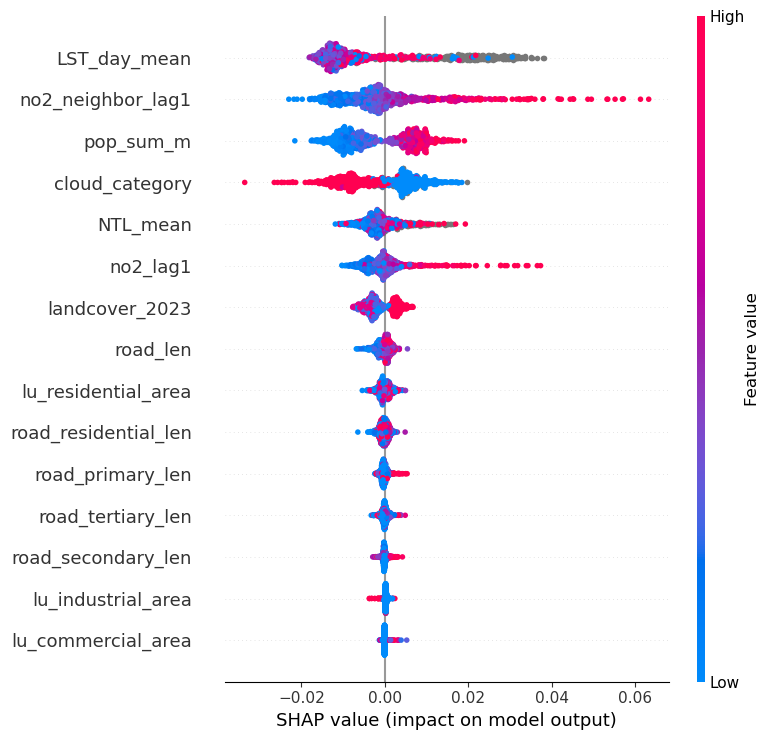

In [8]:
import shap
import pandas as pd

X_df = pd.DataFrame(X_train, columns=features)

# 1. Extract the RandomForest model from the Pipeline
rf_model = best_model.named_steps["rf"]

# 2. Background data: randomly sample a subset of the training set (DataFrame with column names)
X_bg = pd.DataFrame(X_train_scaled, columns=X_df.columns).sample(n=min(1000, len(X_train_scaled)), random_state=0)

# 3. Create the SHAP explainer
explainer = shap.TreeExplainer(rf_model, X_bg)

# 4. Convert the test set to a DataFrame with column names
X_test_df = pd.DataFrame(X_test_scaled, columns=X_df.columns)

# 5. Sample up to 1000 rows from the test set
X_test_sample = X_test_df.sample(n=min(1000, len(X_test_df)), random_state=42)

# 6. Compute SHAP values for the sampled test set
shap_values = explainer.shap_values(X_test_sample)

# 7. Plot the SHAP summary plot (top 15 features)
shap.summary_plot(shap_values, X_test_sample, max_display=15)



#### Approximate elasticities from SHAP


In [ ]:
# # build full feature matrix (drop objs)
# full_X = df_full.dropna(subset=["no2_mean"])[X_cols]

# # get a fresh explainer if you like, or re-use the one above
# _, full_shap = explain_shap(best_model, X_bg, full_X, max_display=0)  
# # max_display=0 suppresses extra plots

# elas_df = compute_elasticities_shap(best_model, full_shap)
# display(elas_df)

### 1.2 XGBoost Model

In [14]:
import xgboost as xgb
from analysis import plot_xgb_training_curve
from analysis import plot_xgb_feature_importance

In [10]:
# Create DMatrix with real feature names
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled, feature_names=features)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled, feature_names=features)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "eta": 0.1
}

evals = [(dtrain, "train"), (dtest, "eval")]
num_round = 100

evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_round,
    evals=evals,
    evals_result=evals_result,
    verbose_eval=False
)

# Predict on test dataset
y_pred_scaled = bst.predict(dtest)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() # Inverse normalization to the original scale
print("Final RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Final RMSE: 1.87551024132141e-05


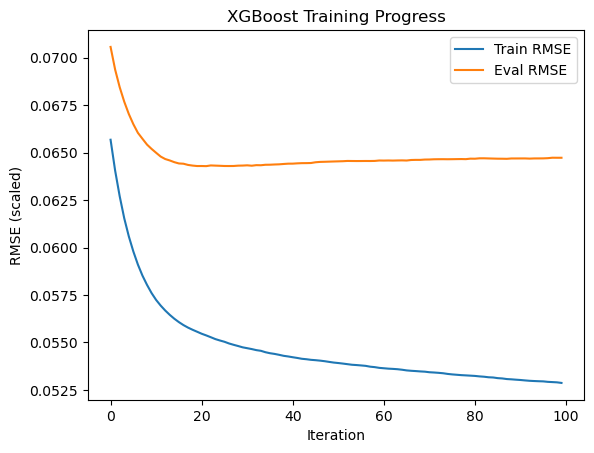

In [ ]:
plot_xgb_training_curve(evals_result)

Feature Importances:
LST_day_mean: 1260.0
NTL_mean: 1177.0
no2_lag1: 1015.0
no2_neighbor_lag1: 699.0
cloud_category: 507.0
pop_sum_m: 344.0
lu_residential_area: 192.0
road_residential_len: 173.0
road_primary_len: 166.0
road_len: 144.0
road_secondary_len: 107.0
road_tertiary_len: 99.0
lu_industrial_area: 61.0
landcover_2023: 51.0
lu_farmland_area: 40.0
road_trunk_len: 28.0
lu_commercial_area: 28.0
lu_retail_area: 20.0
lu_farmyard_area: 17.0
poi_count: 16.0
road_motorway_len: 0
fossil_pp_count: 0


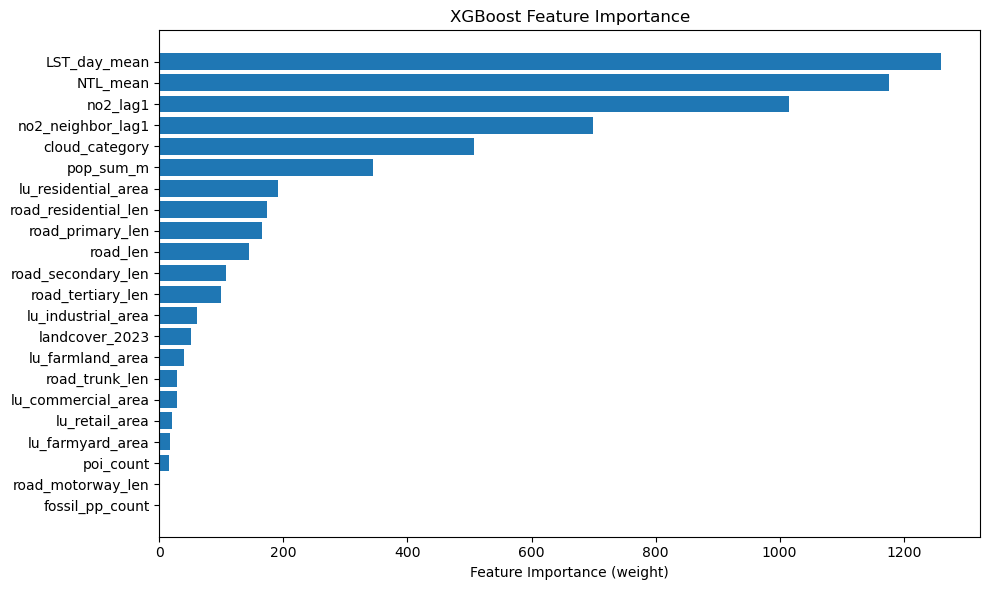

In [15]:
plot_xgb_feature_importance(bst, features)

## 2 Baghdad

### 2.0 Data Preparation and Feature Selection

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# Read the data
full_baghdad_df = pd.read_parquet(DATA_PATH / "temp" / "full_baghdad_df.parquet", engine="pyarrow")
# full_baghdad_df.describe()
# Drop NA
clean_bag_df = full_baghdad_df.dropna(subset=["no2_mean", "no2_lag1", "no2_neighbor_lag1"])

In [ ]:
# select features
features = [
    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 
    
    # night time light
    'NTL_mean', 

    # climate data
    'cloud_category',
    'temp_mean',

    # mobility data
    'TCI',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023'
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',

]

target = ["no2_mean"]

X = clean_bag_df[features].values
y = clean_bag_df[target].values

In [22]:
# Split training and testing sets (preserving time order, no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()  # ravel to 1D for xgboost compatibility
y_test_scaled = scaler_y.transform(y_test).ravel()


### 2.1 Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ParameterSampler, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from tqdm import tqdm
import numpy as np


# Define pipeline
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("rf", RandomForestRegressor(
        n_jobs=-1,
        random_state=42,
        oob_score=True,
        n_estimators=100
    ))
])

# Define simplified parameter space
param_dist = {
    "rf__max_depth":         [10, 15],
    "rf__min_samples_leaf":  [2],
    "rf__max_features":      ["sqrt"],
}

# Custom scorer (lower RMSE is better)
def neg_rmse(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(neg_rmse)

# Generate sampled parameter combinations
param_list = list(ParameterSampler(param_dist, n_iter=2, random_state=42))

best_score = -np.inf
best_model = None
best_params = None

print("Running randomized search with progress bar...\n")

# Randomized search with progress bar
for params in tqdm(param_list):
    model = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("rf", RandomForestRegressor(
            n_jobs=-1,
            random_state=42,
            oob_score=True,
            n_estimators=100,
            max_depth=params["rf__max_depth"],
            min_samples_leaf=params["rf__min_samples_leaf"],
            max_features=params["rf__max_features"],
        ))
    ])
    scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=3, scoring=rmse_scorer, n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_params = params

# Fit the best model
best_model.fit(X_train_scaled, y_train_scaled)


Running randomized search with progress bar...



100%|██████████| 2/2 [05:11<00:00, 155.57s/it]


Pipeline(steps=[('imputer', SimpleImputer()),
                ('rf',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_leaf=2, n_jobs=-1,
                                       oob_score=True, random_state=42))])

#### Fast SHAP on a sub-sample

 98%|===================| 984/1000 [00:58<00:00]        

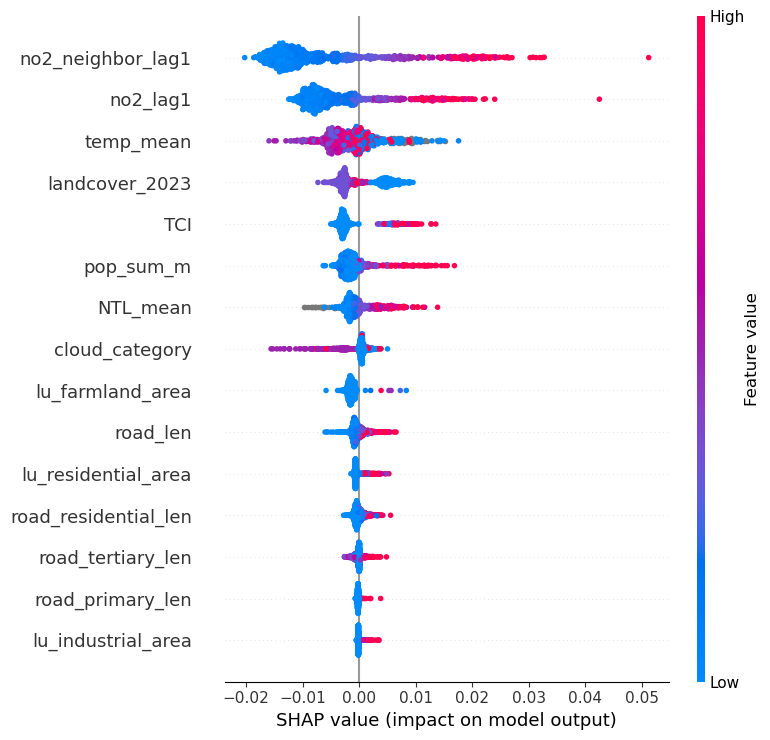

In [24]:
import shap
import pandas as pd

X_df = pd.DataFrame(X_train, columns=features)

# 1. Extract the RandomForest model from the Pipeline
rf_model = best_model.named_steps["rf"]

# 2. Background data: randomly sample a subset of the training set (DataFrame with column names)
X_bg = pd.DataFrame(X_train_scaled, columns=X_df.columns).sample(n=min(1000, len(X_train_scaled)), random_state=0)

# 3. Create the SHAP explainer
explainer = shap.TreeExplainer(rf_model, X_bg)

# 4. Convert the test set to a DataFrame with column names
X_test_df = pd.DataFrame(X_test_scaled, columns=X_df.columns)

# 5. Sample up to 1000 rows from the test set
X_test_sample = X_test_df.sample(n=min(1000, len(X_test_df)), random_state=42)

# 6. Compute SHAP values for the sampled test set
shap_values = explainer.shap_values(X_test_sample)

# 7. Plot the SHAP summary plot (top 15 features)
shap.summary_plot(shap_values, X_test_sample, max_display=15)



### 2.2 XGBoost Model

In [28]:
import xgboost as xgb
from analysis import plot_xgb_training_curve
from analysis import plot_xgb_feature_importance

In [29]:
# Create DMatrix with real feature names
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled, feature_names=features)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled, feature_names=features)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "eta": 0.1
}

evals = [(dtrain, "train"), (dtest, "eval")]
num_round = 100

evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_round,
    evals=evals,
    evals_result=evals_result,
    verbose_eval=False
)

# Predict on test dataset
y_pred_scaled = bst.predict(dtest)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() # Inverse normalization to the original scale
print("Final RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Final RMSE: 0.00013249188237509494


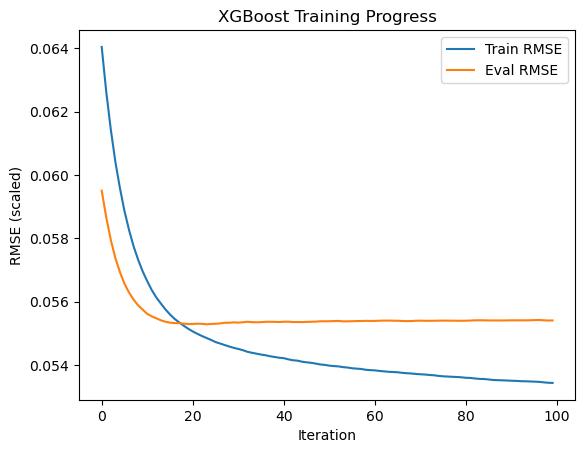

In [30]:
plot_xgb_training_curve(evals_result)

Feature Importances:
temp_mean: 1669.0
NTL_mean: 793.0
no2_lag1: 696.0
no2_neighbor_lag1: 559.0
pop_sum_m: 457.0
cloud_category: 457.0
TCI: 265.0
lu_farmland_area: 256.0
landcover_2023: 220.0
road_len: 180.0
road_residential_len: 147.0
road_tertiary_len: 100.0
lu_residential_area: 100.0
road_motorway_len: 68.0
road_trunk_len: 61.0
lu_industrial_area: 60.0
road_primary_len: 56.0
road_secondary_len: 48.0
lu_commercial_area: 35.0
poi_count: 4.0
fossil_pp_count: 1.0
lu_retail_area: 0
lu_farmyard_area: 0


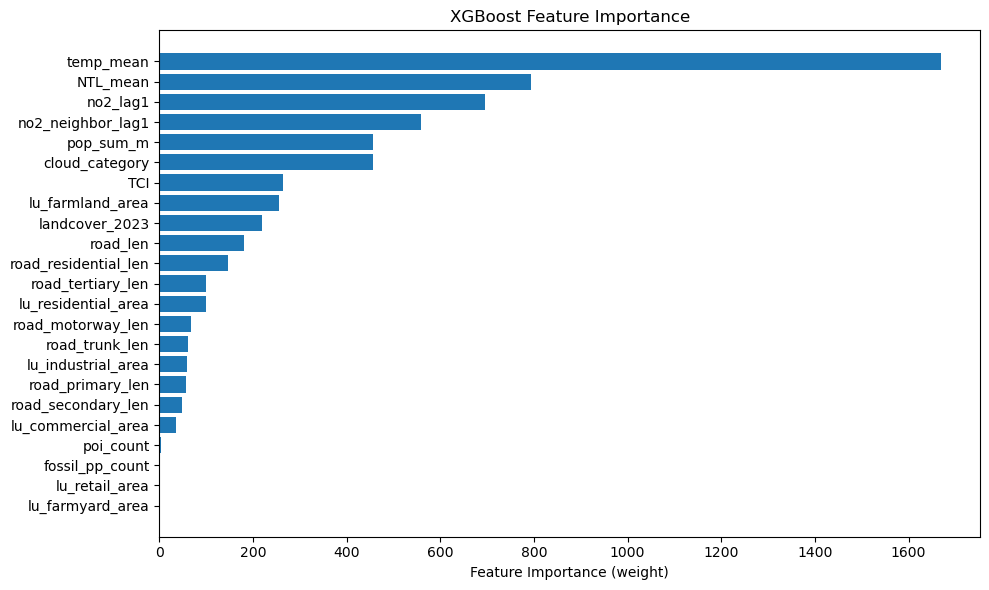

In [31]:
plot_xgb_feature_importance(bst, features)